In [23]:
import matplotlib as mpl
%matplotlib inline

In [1]:
import pandas as pd
import time

start_time = time.time()
dd = {}
dd = pd.read_pickle('mydict.pickle')
print(type(dd))
print("--- %s seconds ---" % round(time.time() - start_time, 2)) 


<class 'dict'>
--- 23.62 seconds ---


In [9]:
dd.keys()

dict_keys(['SYM', 'ADP', 'PRON', 'INTJ', 'X', 'CONJ', 'VERB', 'SCONJ', 'ADV', 'PROPN', 'PUNCT', 'NUM', 'ADJ', 'NOUN', 'AUX'])

In [6]:
[print(x + ' ' + str(len(dd[x]))) for x in dd]


X 75299
ADJ 206586
PRON 7333
VERB 178017
PUNCT 3798
NUM 158030
INTJ 16644
ADV 91998
AUX 2350
SYM 107860
PROPN 719525
NOUN 1938827
SCONJ 2556
ADP 7657
CONJ 4386


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [2]:
import pandas as pd
start_time = time.time()
df = pd.DataFrame([(k1,k2,k3,v)for k1,k23v in dd.items() 
                               for k2,k3v in k23v.items()
                               for k3,v in k3v.items()], columns = ['POS','LEMMA','FORM + FEAT', 'pcs'])
print("--- %s seconds ---" % round(time.time() - start_time, 2)) 
df.head()

--- 5.9 seconds ---


,POS,LEMMA,FORM + FEAT,pcs
0,SCONJ,plug,"(plug, _)",1
1,SCONJ,jätettiiin,"(jätettiiin, _)",4
2,SCONJ,jot-,"(jot-, _)",4
3,SCONJ,ei-vl,"(ei-vl, _)",4
4,SCONJ,nim,"(nim, Style=Coll)",4


In [ ]:
df.sort_values(by='pcs', inplace=True, kind='heapsort',ascending=False)


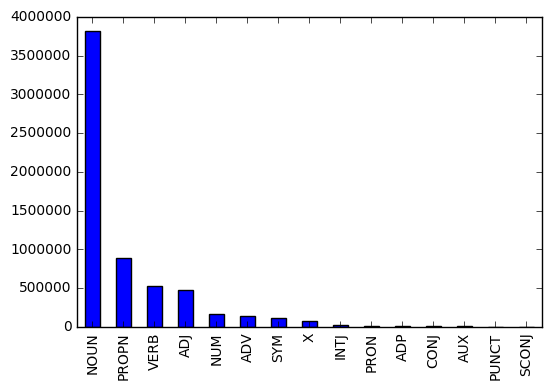

In [24]:
df['POS'].value_counts().plot(kind='bar')

In [3]:
df.dtypes

POS            object
LEMMA          object
FORM + FEAT    object
pcs             int64
dtype: object

In [4]:
df.describe()

,pcs
count,6.249381e+06
mean,2.295931e+01
std,5.073045e+03
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,8.528671e+06


In [15]:
df_ADJ = df.loc[df['POS']=='ADJ']

In [20]:
df_ADJ.reset_index(drop=True, inplace=True)

In [ ]:
df_ADJ['LEMMA'].value_counts().plot(kind='line')